In [2]:
import keras
import os
import pandas as pd
import numpy as np

DATA_PATH = os.path.normpath(os.path.abspath('../Data'))
DATA_CSV = os.path.join(DATA_PATH, 'feature_csv.csv')

In [3]:
df = pd.read_csv(DATA_CSV)

In [4]:
# dividing set on training and test
cond = np.random.rand(len(df)) < 0.8

train_df = df[cond].sample(frac=1)
test_df = df[~cond]

In [5]:
def get_input_and_labels(df: pd.DataFrame):
    input = df.drop(['cat', 'file'], axis=1)
    labels = df['cat']
    return input, labels

x_train, y_train = get_input_and_labels(train_df)
x_test, y_test = get_input_and_labels(test_df)

In [6]:
x_train.head()

,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,cros_33,cros_34,cros_35,cros_36,cros_37,cros_38,cros_39,cros_40,cros_41,cros_42
412,3363.172550,2982.579910,3085.672095,2930.498508,4279.236633,6771.959266,3533.717875,3047.835056,6037.964539,3917.413235,...,0.140456,0.000000,0.000000,0.345987,0.036334,0.000000,0.053145,0.048265,0.088937,0.158894
240,5070.985001,1522.024561,1556.839486,2448.884228,4452.840815,1842.210052,2548.624737,4592.351513,4041.104222,2759.249262,...,0.066758,0.079147,0.093599,0.077082,0.049553,0.011012,0.100482,0.035788,0.036476,0.083964
118,5497.869329,5350.486029,3780.106157,4135.605063,5577.718784,3110.787094,2879.851944,4521.417233,4787.578054,4732.307053,...,0.106264,0.165548,0.133669,0.102349,0.185123,0.070470,0.172260,0.095078,0.096197,0.148770
507,6149.677095,6780.241689,2238.550412,2931.294556,2331.147382,2189.048199,4723.383245,2589.890155,3149.939898,3613.422767,...,0.115914,0.136215,0.156516,0.103471,0.128356,0.146038,0.116568,0.117878,0.151277,0.099542
600,7101.995236,4203.185846,3079.282554,3152.132115,5214.251381,4867.896522,4587.723041,2315.508486,2596.342867,3928.175641,...,0.082257,0.056424,0.054385,0.096533,0.080897,0.092454,0.123046,0.099932,0.052345,0.059823


In [7]:
y_train.head()

412    2
240    2
118    1
507    3
600    4
Name: cat, dtype: int64

In [8]:
# transforms label from 1 dim to 5 dim vector (for ex, if cat is 3 then vector will be 00100)
def transform_y(df_: pd.DataFrame):
    result = []
    for cat in df_.values:
        result.append(np.array([1 if cat == i + 1 else 0 for i in range(5)]))
    return np.array(result)

y_feed = transform_y(y_train)
y_test_feed = transform_y(y_test)

In [9]:
x_feed = x_train.values
x_test_feed = x_test.values


In [10]:
from keras.models import Sequential
from keras.layers import *
import keras.losses as losses
import keras.metrics as metrics
import matplotlib.pyplot as plt

In [11]:
model = Sequential()

model.add(Input(shape=(x_feed.shape[1],), name='Input'))
model.add(Dense(100, activation='sigmoid', name='Dense_1'))
# model.add(Dense(64, activation='sigmoid', name='Dense_2'))
model.add(Dense(5, activation='sigmoid', name='Dense_3'))

model.compile(
    loss=losses.CategoricalCrossentropy(),
    metrics=metrics.CategoricalAccuracy()
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 100)               17300     
_________________________________________________________________
Dense_3 (Dense)              (None, 5)                 505       
Total params: 17,805
Trainable params: 17,805
Non-trainable params: 0
_________________________________________________________________


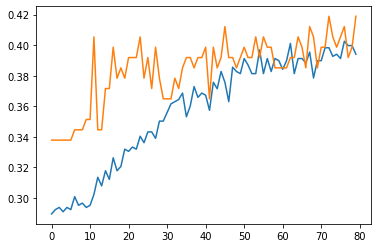

In [12]:
history = model.fit(
    x=x_feed,
    y=y_feed,
    epochs=80,
    verbose=0,
    validation_data=(x_test_feed, y_test_feed)
)

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.show()